In [6]:
import pandas as pd
import numpy as py
import seaborn as sns
import datetime

## Renaming the columns for better readability

In [5]:
df = pd.read_pickle("/Users/Tianwang/ironhack/git/Data_Thief_Project_Team_Wall-e/data/combined_financial_data")
index = ["date","CAC_40_FR","DAX_30_GR","DOW_JONES_US","FTSE_IT","IBEX_SP","NASDAQ_US","NIKKEI_JP","S&P_500_US","SSE_CN"]
df.columns = index
# df.set_index("date").plot(figsize=(25,10));
df

,date,CAC_40_FR,DAX_30_GR,DOW_JONES_US,FTSE_IT,IBEX_SP,NASDAQ_US,NIKKEI_JP,S&P_500_US,SSE_CN
0,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-02,4689.39,10580.19,23346.24,18330.99,8550.0,7263.870,NaN,2510.03,NaN
2,2019-01-03,4611.49,10416.66,22686.22,18218.40,8523.3,7595.350,NaN,2447.89,NaN
3,2019-01-04,4737.12,10767.69,23433.16,18831.79,8737.8,7828.910,19561.96,2531.94,NaN
4,2019-01-05,NaN,NaN,NaN,NaN,NaN,8049.641,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
459,2020-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460,2020-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
461,2020-04-06,4346.14,10075.17,22679.99,17039.31,6844.3,NaN,18576.30,2663.68,NaN
462,2020-04-07,4438.27,10356.70,22653.86,17411.72,7002.0,NaN,18950.18,2659.41,NaN


In [ ]:
df.to_pickle("final_combined_financial_data")

## NaN

There are a lot of NaN values in the dataframe due to weekends. So I created an additional column to identify the weekends. 

In [86]:
#translation date to the weekday

df["day_of_week"] = df["date"].dt.dayofweek+1

In [105]:
df_weekday = df.loc[(df["day_of_week"] < 6),:].loc[(df["date"]!="2020-04-08")]

## Dateframe for weekdays only

In [106]:
df_weekday

,date,CAC_40_FR,DAX_30_GR,DOW_JONES_US,FTSE_IT,IBEX_SP,NASDAQ_US,NIKKEI_JP,S&P_500_US,SSE_CN,day_of_week
0,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,2019-01-02,4689.39,10580.19,23346.24,18330.99,8550.0,7263.870,NaN,2510.03,NaN,3
2,2019-01-03,4611.49,10416.66,22686.22,18218.40,8523.3,7595.350,NaN,2447.89,NaN,4
3,2019-01-04,4737.12,10767.69,23433.16,18831.79,8737.8,7828.910,19561.96,2531.94,NaN,5
6,2019-01-07,4719.17,10747.81,23531.35,18953.27,8776.3,8091.164,20038.97,2549.69,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
456,2020-04-01,4207.24,9544.75,20943.51,16544.97,6579.4,NaN,18065.41,2470.50,2734.521973,3
457,2020-04-02,4220.96,9570.82,21413.44,16834.03,6574.1,9467.973,17818.72,2526.90,2780.637939,4
458,2020-04-03,4154.58,9525.77,21052.53,16384.35,6581.6,9018.090,17820.19,2488.65,2763.987061,5
461,2020-04-06,4346.14,10075.17,22679.99,17039.31,6844.3,NaN,18576.30,2663.68,NaN,1


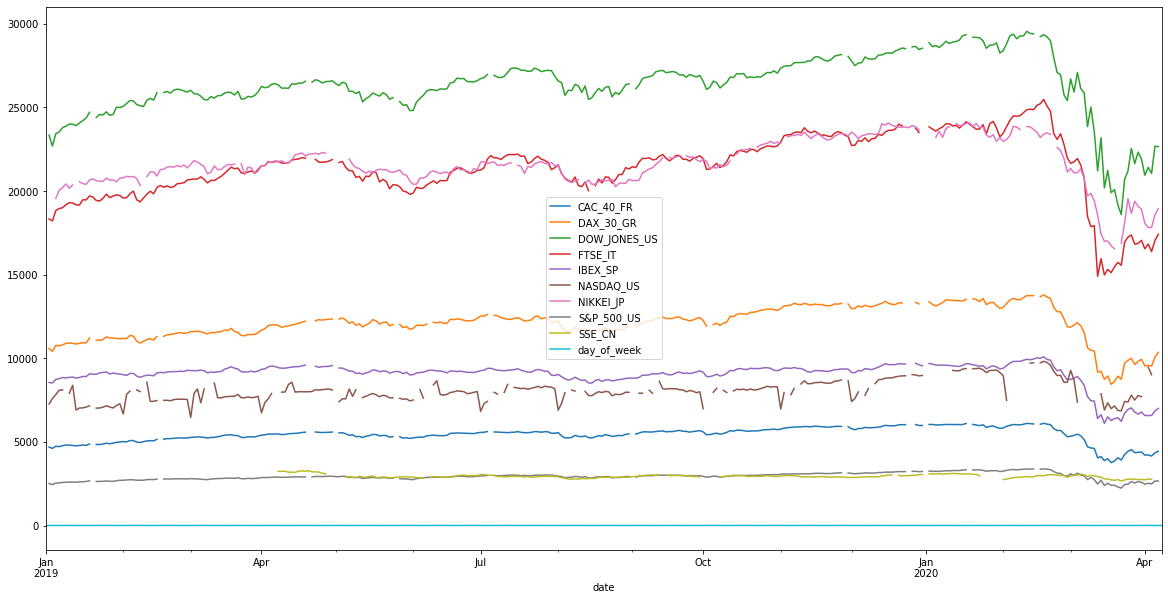

In [101]:
df_weekday.set_index("date").plot(figsize=(20,10));

## Validation

I did some validation on the NIKKEI index by comparing the data with online financial data. 

Also crossed checked the NASDAQ, because it stll had a lot of gaps. But it seems that those values were truely not available. Since we have 3 index for the US, we decided to drop NASDAQ




In [118]:
df_NIKKEI.columns

Index(['date', 'value_NIKKEI_25_JP'], dtype='object')

In [128]:
df_NIKKEI

,date,value_NIKKEI_25_JP
0,2020-04-07,18950.18
1,2020-04-06,18576.30
2,2020-04-03,17820.19
3,2020-04-02,17818.72
4,2020-04-01,18065.41
...,...,...
299,2019-01-10,20163.80
300,2019-01-09,20427.06
301,2019-01-08,20204.04
302,2019-01-07,20038.97
